In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Parameter values
beta = 3.0*10**-4
mu = 0.1
N=10**3

#Set the number of sampels wanted
S=10000

In [2]:
#Function runs a simulation and returns the value of R
def totalR():
    # Set initial conditions and the initial time
    S = 10**3 - 1
    I = 1
    R = 0
    t = 0

    # --- While the outbreak is ongoing (I > 0), generate events --- #
    while I > 0:

        r1 = np.random.uniform(0, 1, 1)
        totalRate = beta*I*S + mu*I
        t = t - (1/totalRate)*np.log(r1)

        r2 = np.random.uniform(0, 1, 1)
        if r2 < beta*I*S/totalRate:
            S = S - 1
            I = I + 1
        else:
            I = I - 1
            R = R + 1
    return R

In [3]:
#For loop to create the samples and store them in an array
samples=np.array([])
for k in range(0,S):
    samples=np.append(samples, totalR())

In [4]:
#Function that finds the Prob(M>m) for each value of m using the generated samples
def prop(m):
    count=0
    for k in range(0,S):
        if samples[k]>m:
            count+=1
    return count/S

In [5]:
j=1000
mvals=np.linspace(0,j,j+1)
mresults=np.array([])
for k in range(0,j+1):
    mresults=np.append(mresults,prop(k))


In [6]:
#Solving the initial size equation for the initial conditions given
def f(x):
    return x+(N*np.exp(-1*beta*x/mu))-N
solution=fsolve(f,1000)

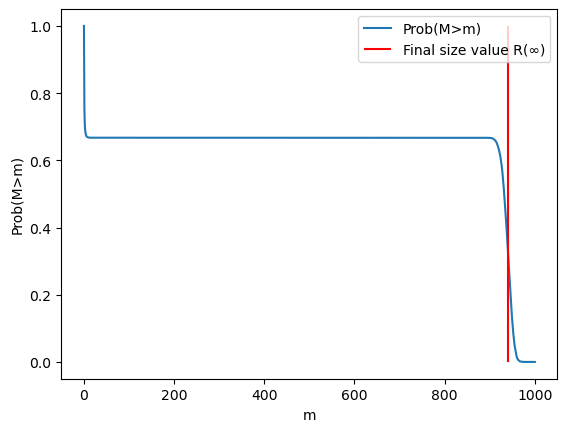

In [7]:
#Plotting the graph of m against Prob(M>m) and the final size value
plt.plot(mvals,mresults,label="Prob(M>m)")
plt.vlines(x=solution, ymin=0, ymax=1, color="red",label="Final size value R(∞)")
plt.ylabel("Prob(M>m)")
plt.xlabel("m")
plt.legend()
plt.show()